# Twitter Sentiment Analysis

## About Dataset
Twitter Sentiment Analysis Dataset
### Overview
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

Data :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

## Cleaning and preparing the data for model training

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sns.set_style("dark")
plt.rcParams['figure.figsize'] = (12, 7)

## Importing the Dataset

In [3]:
df = pd.read_csv('twitter_training.csv')

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.shape

(74681, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
new_row = {'2401': 2401, 'Borderlands': 'Borderlands','Positive' : 'Positive', 'im getting on borderlands and i will murder you all ,':'im getting on borderlands and i will murder you all ,' }

# Use the append() method to add the new row
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [8]:
df.shape

(74682, 4)

In [9]:
df = df.rename(columns={'2401': 'Tweet ID', 'Borderlands': 'entity','Positive' : 'sentiment', 'im getting on borderlands and i will murder you all ,':'Tweets' }
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet ID   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   Tweets     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
df.head()

,Tweet ID,entity,sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
df['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [13]:
df['Tweet ID'].unique()

array([2401, 2402, 2403, ..., 9198, 9199, 9200], dtype=int64)

In [14]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [15]:
df = df[df['sentiment'] != 'Irrelevant']

In [16]:
df.head()

,Tweet ID,entity,sentiment,Tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [17]:
df.shape

(61692, 4)

## Missing Values

In [18]:
df.isnull().sum()

Tweet ID       0
entity         0
sentiment      0
Tweets       571
dtype: int64

<Axes: >

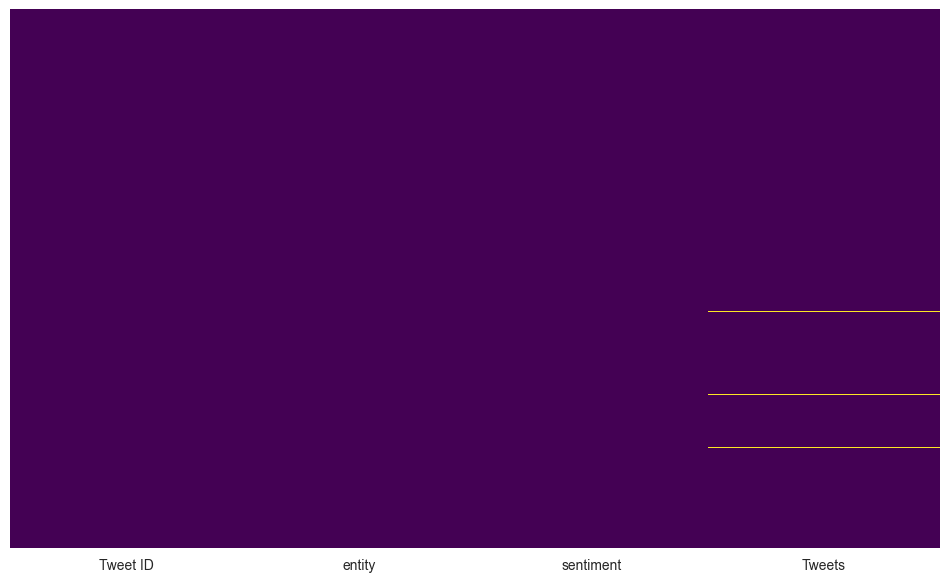

In [19]:
sns.heatmap(df.isnull() , yticklabels=False , cbar = False , cmap = 'viridis')

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

Tweet ID     0
entity       0
sentiment    0
Tweets       0
dtype: int64

In [22]:
df.shape

(61121, 4)

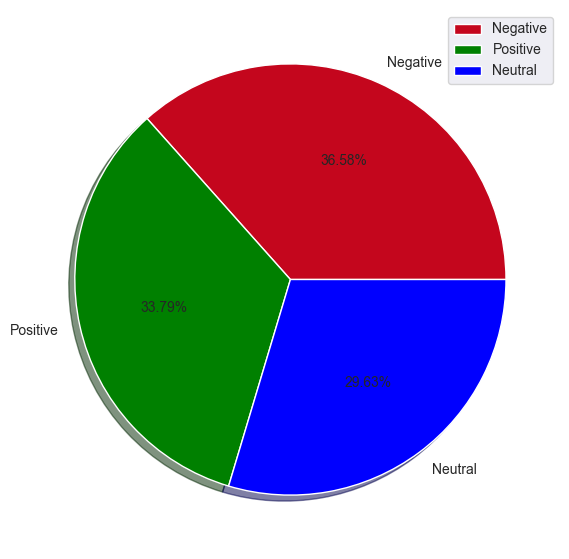

In [23]:
sentiment_counts = df['sentiment'].value_counts()

# Define colors
colors = ['#C4061D', 'green', 'blue']

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, shadow=True, autopct='%.2f%%')
plt.axis('off')
plt.legend()
plt.show()

In [24]:
import re

df["lower"] = df["Tweets"].str.lower()  # Convert to lowercase
df["lower"] = [str(data) for data in df["lower"]]  # Convert all to string
df["lower"] = df["lower"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))  # Apply regex


In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Join the processed tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
df.head()

,Tweet ID,entity,sentiment,Tweets,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [27]:
df['ProcessedText'] = df['Tweets'].apply(preprocess_text)

In [28]:
df.head()

,Tweet ID,entity,sentiment,Tweets,lower,ProcessedText
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,"coming border kill ,"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,"im getting borderland kill ,"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"im coming borderland murder ,"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"im getting borderland 2 murder ,"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,"im getting borderland murder ,"


In [29]:
df.drop(['Tweets'], axis = 1, inplace = True)

In [30]:
df.head()

,Tweet ID,entity,sentiment,lower,ProcessedText
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,"coming border kill ,"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"im getting borderland kill ,"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"im coming borderland murder ,"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"im getting borderland 2 murder ,"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"im getting borderland murder ,"


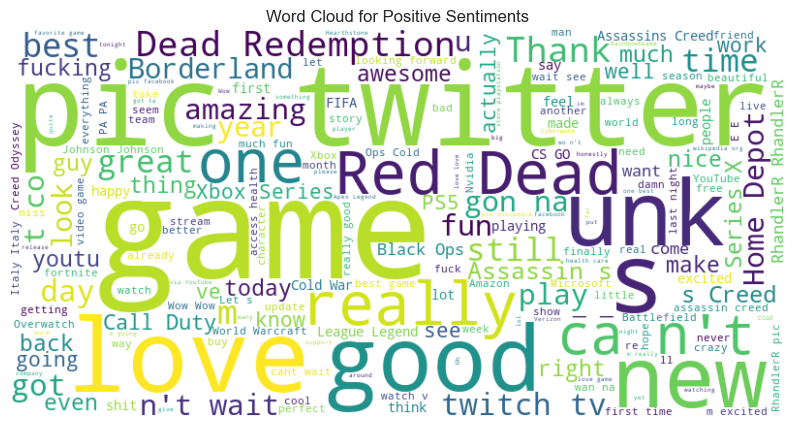

In [31]:
from wordcloud import WordCloud

# Filter for positive sentiment tweets
positive_tweets = df[df['sentiment'] == 'Positive']['ProcessedText'].str.cat(sep=' ')

# Generate a word cloud for positive tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Sentiments")
plt.axis('off')
plt.show()


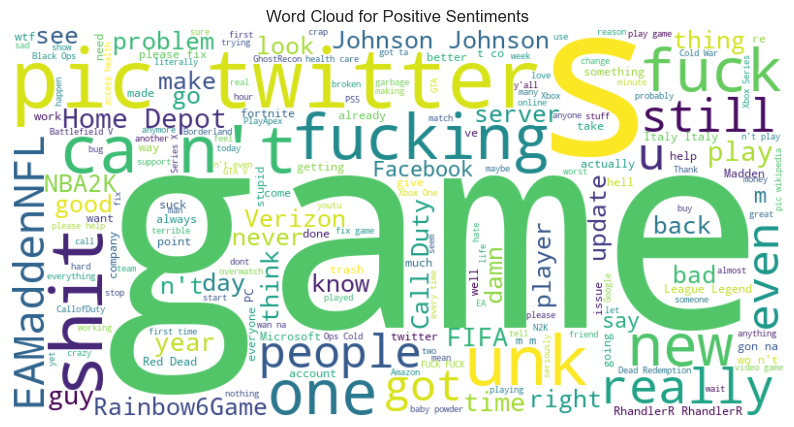

In [32]:
from wordcloud import WordCloud

# Filter for positive sentiment tweets
positive_tweets = df[df['sentiment'] == 'Negative']['ProcessedText'].str.cat(sep=' ')

# Generate a word cloud for positive tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Sentiments")
plt.axis('off')
plt.show()


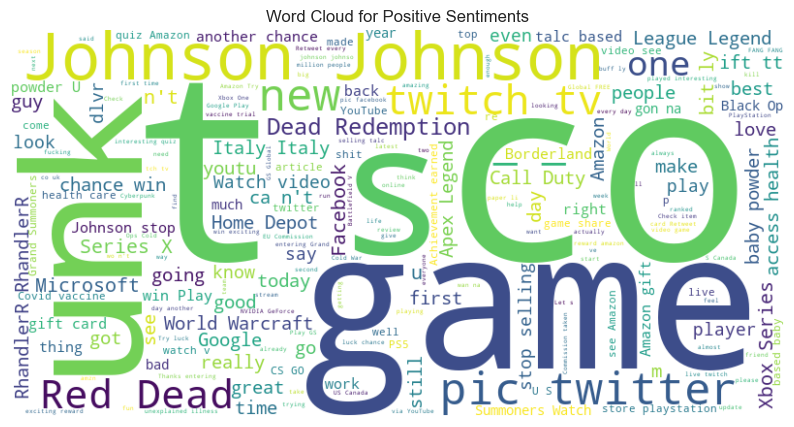

In [33]:
from wordcloud import WordCloud

# Filter for positive sentiment tweets
positive_tweets = df[df['sentiment'] == 'Neutral']['ProcessedText'].str.cat(sep=' ')

# Generate a word cloud for positive tweets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Sentiments")
plt.axis('off')
plt.show()


## Textual Analysis

In [34]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in df.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  26395


In [35]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

## Logistic Regression model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [38]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(df, test_size=0.2, random_state=0)

In [39]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [40]:
X_test_bow

<12225x25080 sparse matrix of type '<class 'numpy.int64'>'
	with 133021 stored elements in Compressed Sparse Row format>

In [41]:
print(reviews_train.columns)
print(reviews_test.columns)

Index(['Tweet ID', 'entity', 'sentiment', 'lower', 'ProcessedText'], dtype='object')
Index(['Tweet ID', 'entity', 'sentiment', 'lower', 'ProcessedText'], dtype='object')


In [42]:
#Labels for train and test encoding
y_train_bow = reviews_train['sentiment']
y_test_bow = reviews_test['sentiment']

In [43]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

sentiment
Negative    0.363354
Positive    0.336687
Neutral     0.299959
Name: count, dtype: float64

In [44]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  86.1676891615542


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
